In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_sample_images
%matplotlib inline
import matplotlib.pyplot as plt

/home/xd/ws/tf/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
dataset = np.array(load_sample_images().images, dtype=np.float32)
batch_size, height, width, channels = dataset.shape

/home/xd/ws/tf/lib/python3.5/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/home/xd/ws/tf/lib/python3.5/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


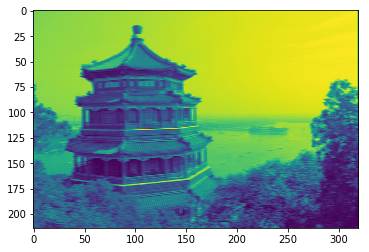

In [4]:
filters_test = np.zeros(shape=(7,7, channels, 2), dtype=np.float32)
filters_test[:,3,:,0] = 1
filters_test[3,:,:,1] = 1
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters_test, strides=[1,2,2,1], padding='SAME')

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X:dataset})
plt.imshow(output[0,:,:,1])
plt.show()

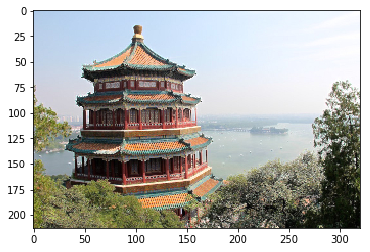

In [12]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X:dataset})
plt.imshow(output[0].astype(np.uint8))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


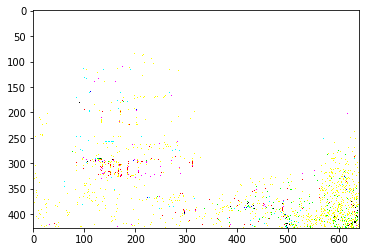

In [11]:
plt.imshow(dataset[0])